In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('nigerian_law_firm_candidates.csv')

# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1000 non-null   object 
 1   Gender          1000 non-null   object 
 2   Ethnicity       1000 non-null   object 
 3   University      1000 non-null   object 
 4   Specialty       1000 non-null   object 
 5   Experience      1000 non-null   object 
 6   GPA             1000 non-null   float64
 7   Publications    1000 non-null   int64  
 8   InterviewScore  1000 non-null   float64
 9   Hired           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB
None
              GPA  Publications  InterviewScore        Hired
count  1000.00000   1000.000000     1000.000000  1000.000000
mean      3.98264      1.002000        5.492500     0.230000
std       0.48164      0.976191        2.560721     0.421043
min       2.51000      0.000000        1.0

In [6]:
import flask
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import sys

In [7]:
print("Package Versions:")
print(f"Flask:         {flask.__version__}")
print(f"Numpy:         {np.__version__}")
print(f"Pandas:        {pd.__version__}")
print(f"Scikit-learn:  {sklearn.__version__}")
print(f"Matplotlib:    {matplotlib.__version__}")
print(f"python:    {sys.version}")

Package Versions:
Flask:         2.2.5
Numpy:         1.26.4
Pandas:        2.2.3
Scikit-learn:  1.6.1
Matplotlib:    3.8.4
python:    3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Name              0
Gender            0
Ethnicity         0
University        0
Specialty         0
Experience        0
GPA               0
Publications      0
InterviewScore    0
Hired             0
dtype: int64


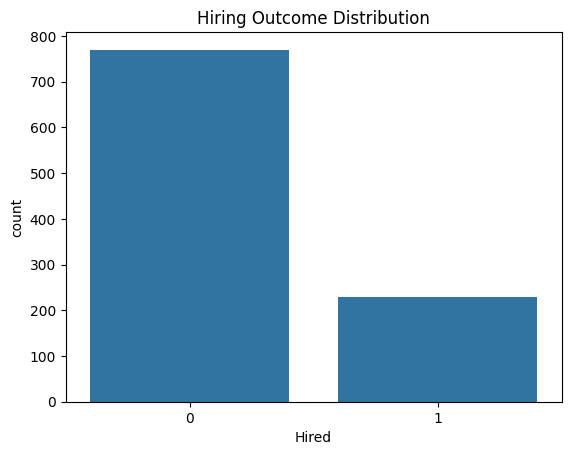

In [9]:
# Distribution of target
sns.countplot(x='Hired', data=df)
plt.title("Hiring Outcome Distribution")
plt.show()

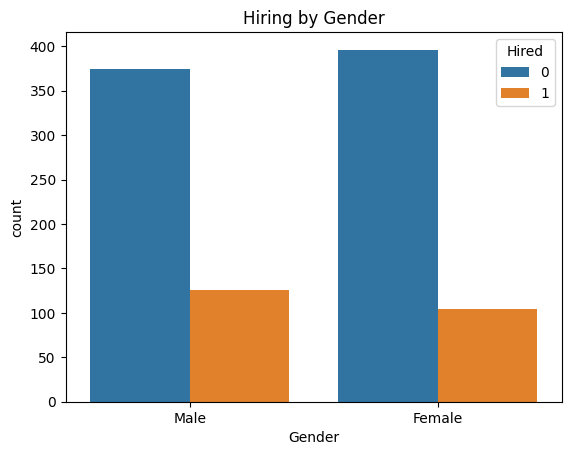

In [10]:
# Gender distribution
sns.countplot(x='Gender', hue='Hired', data=df)
plt.title("Hiring by Gender")
plt.show()

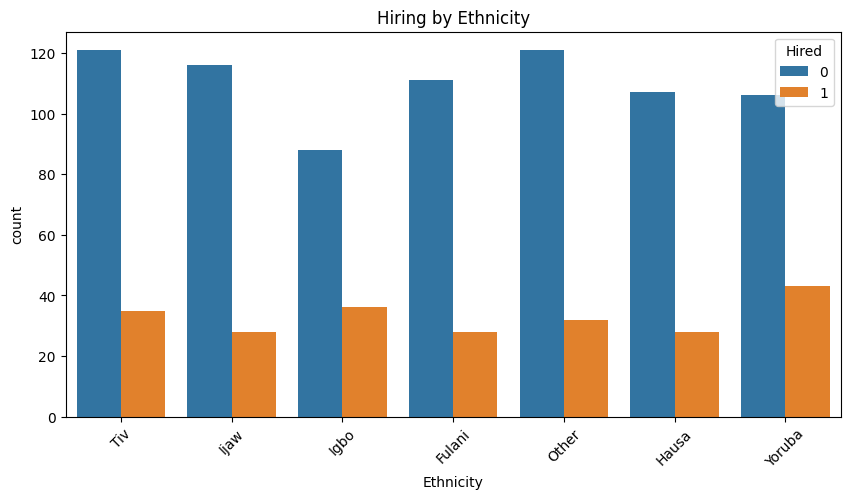

In [11]:
# Ethnicity distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Ethnicity', hue='Hired', data=df)
plt.title("Hiring by Ethnicity")
plt.xticks(rotation=45)
plt.show()

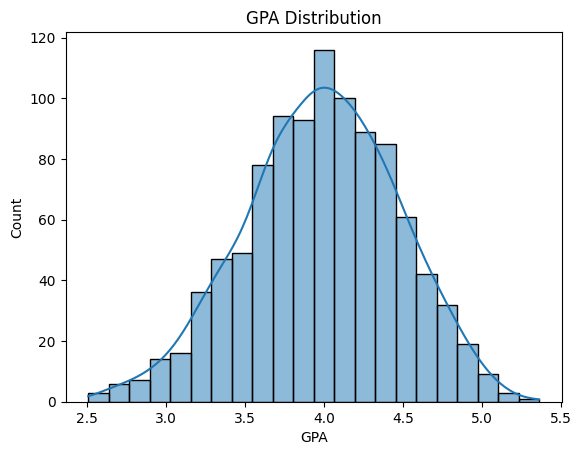

In [12]:

# GPA distribution
sns.histplot(df['GPA'], kde=True)
plt.title("GPA Distribution")
plt.show()

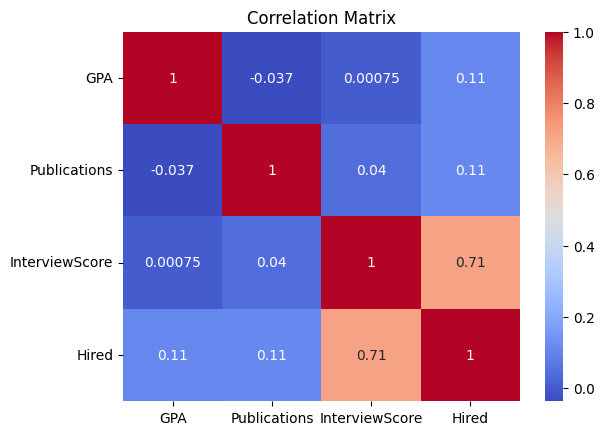

In [13]:
# Correlation heatmap
numeric_cols = ['GPA', 'Publications', 'InterviewScore', 'Hired']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in ['Gender', 'Ethnicity', 'University', 'Specialty', 'Experience']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save for inverse transform later

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['GPA', 'Publications', 'InterviewScore']] = scaler.fit_transform(
    df_encoded[['GPA', 'Publications', 'InterviewScore']]
)

In [16]:
import random

def generate_resume(specialty):
    keywords = specialty.split()
    filler = "experienced in delivering high-quality solutions"

    if len(keywords) >= 2:
        selected = random.sample(keywords, 2)
    elif len(keywords) == 1:
        selected = keywords
    else:
        selected = ["Generalist"]

    return ' '.join(selected) + ' ' + filler


In [17]:
df['ResumeText'] = df['Specialty'].apply(generate_resume)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)
X_text = vectorizer.fit_transform(df['ResumeText']).toarray()

In [19]:
X_structured = df_encoded[['Gender', 'Ethnicity', 'University', 'Specialty', 'Experience', 'GPA', 'Publications', 'InterviewScore']]
X_combined = pd.concat([pd.DataFrame(X_structured), pd.DataFrame(X_text)], axis=1)
y = df_encoded['Hired']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [21]:
X_combined.columns = X_combined.columns.astype(str)

In [22]:
X_combined = pd.concat([pd.DataFrame(X_structured), pd.DataFrame(X_text)], axis=1)
X_combined.columns = X_combined.columns.astype(str)  # Fix column types

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # use 'binary' if binary classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)

# Display results
print("🔍 Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\n📊 Confusion Matrix:")
print(conf_matrix)
print("\n📝 Classification Report:")
print(report)


🔍 Evaluation Metrics:
Accuracy:  0.9300
Precision: 0.9291
Recall:    0.9300
F1 Score:  0.9294

📊 Confusion Matrix:
[[150   6]
 [  8  36]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       156
           1       0.86      0.82      0.84        44

    accuracy                           0.93       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.93      0.93      0.93       200



In [25]:
def statistical_parity(df, sensitive_attr, privileged_group):
    privileged = df[df[sensitive_attr] == privileged_group]
    unprivileged = df[df[sensitive_attr] != privileged_group]
    return round(unprivileged['Hired'].mean() - privileged['Hired'].mean(), 3)

def equal_opportunity(df, sensitive_attr, privileged_group):
    df_pos = df[df['Hired'] == 1]
    priv = df_pos[df_pos[sensitive_attr] == privileged_group]
    unpriv = df_pos[df_pos[sensitive_attr] != privileged_group]
    tpr_priv = len(priv) / len(df[df[sensitive_attr] == privileged_group])
    tpr_unpriv = len(unpriv) / len(df[df[sensitive_attr] != privileged_group])
    return round(tpr_unpriv - tpr_priv, 3)

def disparate_impact(df, sensitive_attr, privileged_group):
    priv = df[df[sensitive_attr] == privileged_group]
    unpriv = df[df[sensitive_attr] != privileged_group]
    ratio = unpriv['Hired'].mean() / priv['Hired'].mean()
    return round(ratio, 3)

# Example usage
print("Statistical Parity (Gender):", statistical_parity(df, 'Gender', 'Male'))
print("Equal Opportunity (Gender):", equal_opportunity(df, 'Gender', 'Male'))
print("Disparate Impact (Gender):", disparate_impact(df, 'Gender', 'Male'))

Statistical Parity (Gender): -0.044
Equal Opportunity (Gender): -0.044
Disparate Impact (Gender): 0.825


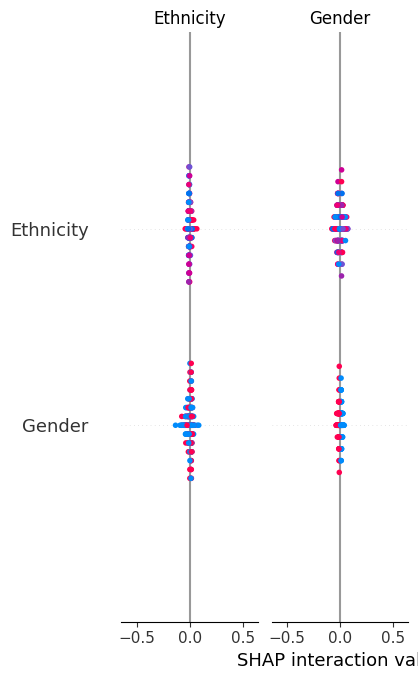

In [26]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# For binary classification
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)


In [27]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pickle

with open('/content/drive/MyDrive/KDD/model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('/content/drive/MyDrive/KDD/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('/content/drive/MyDrive/KDD/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
!pip install fairlearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
df = pd.read_csv('nigerian_law_firm_candidates.csv')  # Replace with your actual file

import random

# Define specialty keywords
resume_keywords = {
    'Corporate': ['mergers', 'contracts', 'compliance', 'negotiation'],
    'Criminal': ['litigation', 'evidence', 'defense', 'trial'],
    'Family': ['custody', 'divorce', 'mediation', 'adoption'],
    'Intellectual Property': ['patents', 'copyright', 'trademark', 'licensing'],
    'Tax': ['audit', 'returns', 'regulations', 'deductions'],
    'Human Rights': ['advocacy', 'justice', 'equality', 'freedom'],
    'Other': ['research', 'writing', 'analysis', 'strategy']
}

def generate_resume(specialty):
    keywords = resume_keywords.get(specialty, ['law', 'practice'])
    filler = "experienced in delivering high-quality legal solutions"
    selected = random.sample(keywords, min(2, len(keywords)))
    return ' '.join(selected) + ' ' + filler

# Generate resume text before encoding
df['ResumeText'] = df['Specialty'].apply(generate_resume)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'Ethnicity', 'University', 'Specialty', 'Experience']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Separate features
X_structured = df[['Gender', 'Ethnicity', 'University', 'Specialty', 'Experience', 'GPA', 'Publications', 'InterviewScore']]
y = df['Hired']
X_text = df['ResumeText']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=15)
X_text_vec = vectorizer.fit_transform(X_text).toarray()

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_structured[['GPA', 'Publications', 'InterviewScore']])

# Combine structured + scaled + text features
X_combined = pd.concat([
    X_structured[['Gender', 'Ethnicity', 'University', 'Specialty', 'Experience']].reset_index(drop=True),
    pd.DataFrame(X_scaled, columns=['GPA_scaled', 'Publications_scaled', 'InterviewScore_scaled']),
    pd.DataFrame(X_text_vec)
], axis=1)

X_combined.columns = X_combined.columns.astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model and tools
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# 🔍 Bias Audit: Hiring Rate by Gender
df['Prediction'] = model.predict(X_combined)
bias_summary = df.groupby('Gender')['Prediction'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Prediction', data=bias_summary, palette='coolwarm')
plt.title('Hiring Rate by Gender')
plt.ylabel('Predicted Hiring Rate')
plt.tight_layout()
plt.savefig('bias_audit.png')
plt.close()

# 📊 Fairness Metrics with Fairlearn
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate

metric_frame = MetricFrame(
    metrics={
        "selection_rate": selection_rate,
        "false_positive_rate": false_positive_rate,
        "true_positive_rate": true_positive_rate
    },
    y_true=y,
    y_pred=df['Prediction'],
    sensitive_features=df['Gender']
)

print("Fairness Metrics by Gender:")
print(metric_frame.by_group)
metric_frame.by_group.to_csv('fairness_metrics.csv')